### By: Gauripriya Kakati

## Intern at GRIP The Sparks Foundation

### Data Science and Business Analytics
### Task No - 02 : Prediction Using Unsupervised ML

#### Importing Libraries

In [198]:
import numpy as np
import pandas as pd

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Reading the data

In [200]:
iris = pd.read_csv('Iris.csv')

In [201]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [202]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [203]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [204]:
iris.shape

(150, 6)

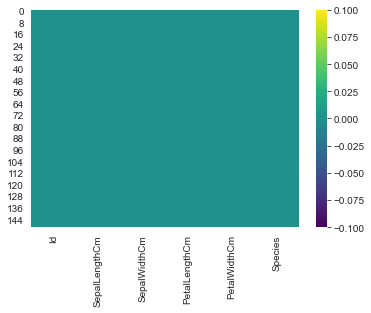

In [205]:
sns.heatmap(iris.isnull(), cmap='viridis')

##### No null values

In [206]:
iris.max()

Id                          150
SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object

In [207]:
iris.groupby(['Species']).count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


##### As we can see there are 50 samples for each species

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


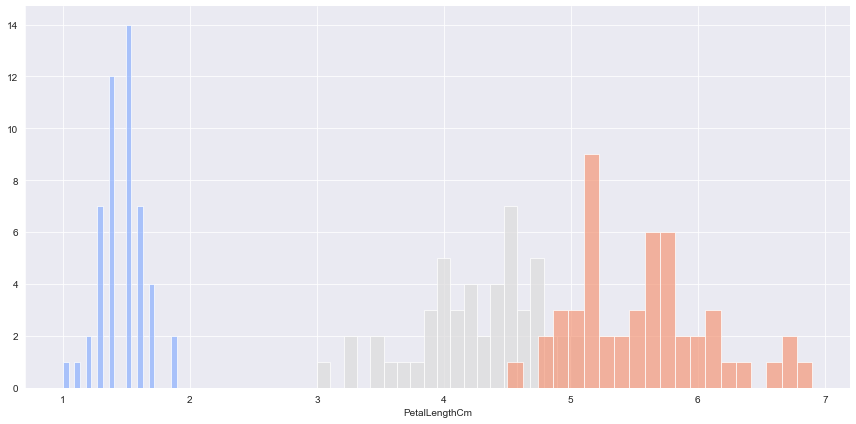

In [208]:
sns.set_style('darkgrid')
g = sns.FacetGrid(iris,hue="Species",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'PetalLengthCm',bins=20,alpha=0.7)

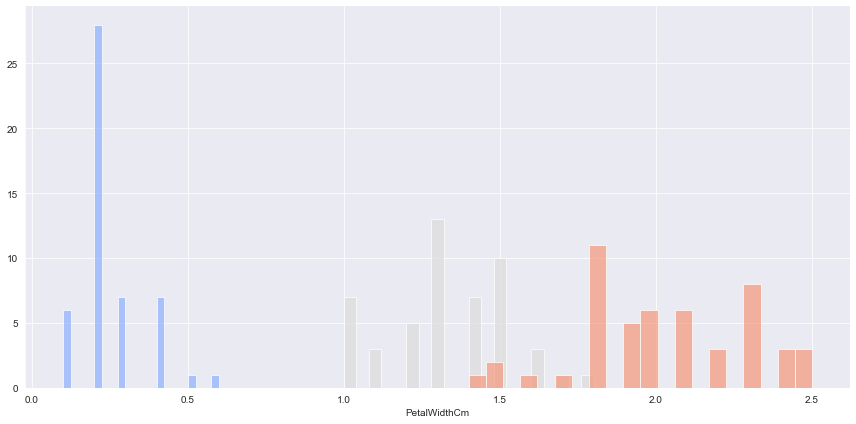

In [209]:
sns.set_style('darkgrid')
g = sns.FacetGrid(iris,hue="Species",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'PetalWidthCm',bins=20,alpha=0.7)

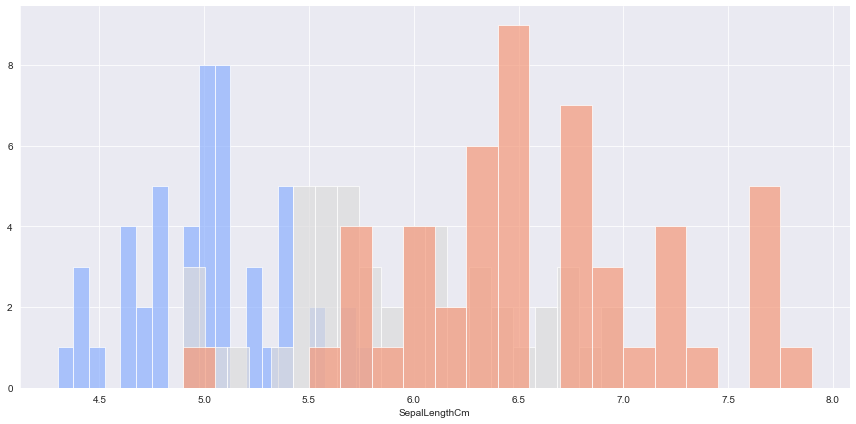

In [210]:
sns.set_style('darkgrid')
g = sns.FacetGrid(iris,hue="Species",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'SepalLengthCm',bins=20,alpha=0.7)

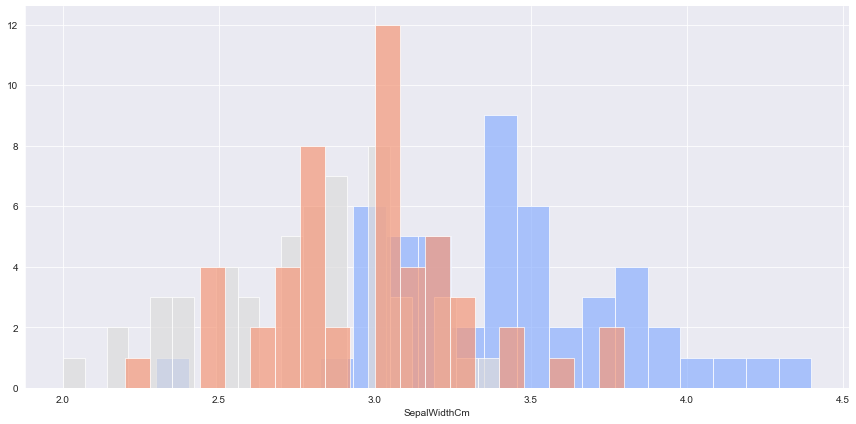

In [211]:
sns.set_style('darkgrid')
g = sns.FacetGrid(iris,hue="Species",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'SepalWidthCm',bins=20,alpha=0.7)

##### These are the histogram of ratio of width and length of sepal and petal of different species

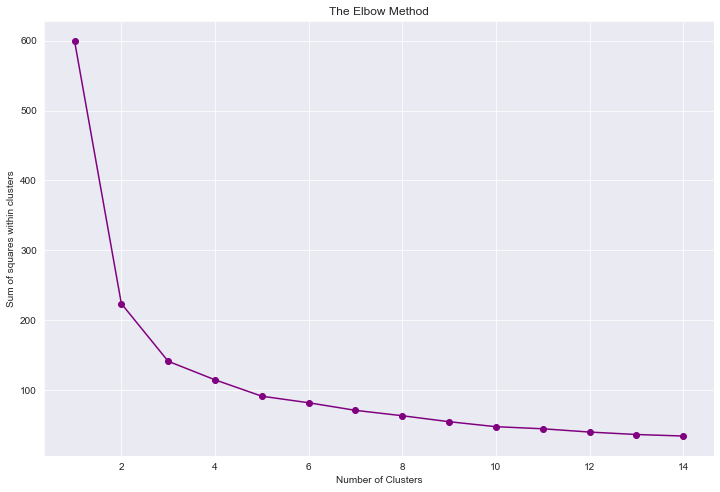

In [212]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transform)
    Sum_of_squared_distances.append(km.inertia_)

    
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))    
plt.plot(range(1,15), Sum_of_squared_distances, color='purple', marker='o')
plt.xlabel('Number of Clusters')
plt.title('The Elbow Method')
plt.ylabel('Sum of squares within clusters')
plt.show()

##### The Elbow Method, here the "elbow"(the point of inflection on the curve) shows that the underlying model fits bets at that point

##### Creating Clusters

In [213]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [214]:
z = iris.iloc[:, [1,2,3,4]].values
ss = StandardScaler()
ss.fit(z)
z_transform = ss.transform(z)

In [215]:
km = KMeans(n_clusters=3, init='k-means++', max_iter = 300, n_init = 10, random_state =0)

In [216]:
y_kmeans = kmeans.fit_predict(z)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 2 3 2 3 2 3 2 2
 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 0 2 0 0 0 0 3 0 0 0 2
 2 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 2
 0 2]


##### Visualize Data

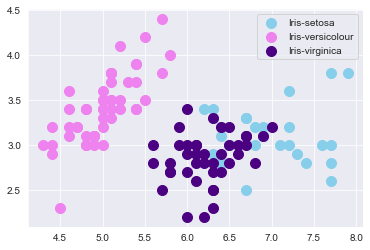

In [217]:
plt.scatter(z[y_kmeans==0,0], z[y_kmeans == 0,1], s=100, c='skyblue', label = 'Iris-setosa')
plt.scatter(z[y_kmeans==1,0], z[y_kmeans == 1,1], s=100, c='violet', label = 'Iris-versicolour')
plt.scatter(z[y_kmeans==2,0], z[y_kmeans == 2,1], s=100, c='indigo', label = 'Iris-virginica')

plt.legend()